In [1]:
import seaborn as sns 
import pandas as pd 
import numpy as np
import time
import matplotlib.pyplot as plt
import torch

sns.color_palette('colorblind')
penguins = sns.load_dataset("penguins")

/home/adrian/.local/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from mab import eps_bandit
from finalenv import RLIAEnv 
from contextualMab import contextual_bandit

env = RLIAEnv() 

kind_experiment = { 
    0: "Random",
    1: "MAB",
    2: "Contextual_MAB",
}

chosen_strategy = { 
    0: "Latest beam",
    1: "9x9",
    2: "25x25",
    3: "Exaustive search",
}

def appendToDf(df, type, ts_begin, ts_end, spectral_efficiency, episode, reward, strategy, distance):
    df.loc[len(df)] = [type, kind_experiment[type],ts_begin, ts_end, ts_end-ts_begin, spectral_efficiency, episode, reward, strategy, chosen_strategy[strategy], distance]



episodes = 1000
training_episodes = 1000 



In [4]:
 #Training MAB
eps=.4
mab_agent = eps_bandit(k=4, eps=eps, iters=training_episodes) 


for i in range(training_episodes): 
     action = mab_agent.act(eps)
     _ , r, _ , _ = env.step(action=action)
     #print("action: ", action)
     # Collect reward.
     mab_agent.learn(reward=r, action=action) 

# Training Contextual MAB    
eps=.4
print(env.state)
env.step(action=3)
lr= 0.001
contextual_agent = contextual_bandit(k=4, eps=eps, iters=training_episodes, hidden_size=32, 
    state_size=3, learning_rate=lr)  

for i in range(training_episodes): 
    flat_state = np.array((env.state[0], env.state[1], env.state[2]), dtype = float)
    action = contextual_agent.act(flat_state,eps)
    print("action: ", action)
    #print("distance: ", env.bsuedis)
    #print("differential: ", env.state[1])
    print("angle: ", env.phiid)
    #print(env.spec)
    _ , r, _ , _ = env.step(action=action)
    print(r)
    # Collect reward.
    #P contextual_agent.learn(reward=r, state=flat_state, action=action)
    contextual_agent.learn(reward=r, state=flat_state, action=action)


(0.043826781075377144, 1, -1.6724448893361483, 7.115526396642867)
EXPLOIT
action:  3
angle:  -25
-0.6638886347565031
tensor(1.3215, grad_fn=<SmoothL1LossBackward0>)
EXPLOIT
action:  2
angle:  -15
-0.5999999969910176
tensor(0.5746, grad_fn=<SmoothL1LossBackward0>)
EXPLOIT
action:  2
angle:  -5
-0.5999999999372795
tensor(0.6629, grad_fn=<SmoothL1LossBackward0>)
EXPLOIT
action:  2
angle:  5
-0.48387570883475206
tensor(0.3766, grad_fn=<SmoothL1LossBackward0>)
EXPLOIT
action:  1
angle:  15
0.8948484804164585
tensor(0.4015, grad_fn=<SmoothL1LossBackward0>)
action:  2
angle:  25
-0.5999998837527639
tensor(0.6644, grad_fn=<SmoothL1LossBackward0>)
EXPLOIT
action:  0
angle:  35
-0.299999908835774
tensor(0.0004, grad_fn=<SmoothL1LossBackward0>)
EXPLOIT
action:  2
angle:  45
-0.5999999999817289
tensor(0.6459, grad_fn=<SmoothL1LossBackward0>)
action:  3
angle:  -45
-0.48923793602476784
tensor(0.8113, grad_fn=<SmoothL1LossBackward0>)
EXPLOIT
action:  1
angle:  -35
-0.4499940710810913
tensor(0.1030, 

In [6]:
epinumcmab = 0
epinummab = 0
epinumrand = 0

measurements = pd.DataFrame(columns=["type",  "type_str",
                  "ts_begin", "ts_end", "ts_diff", "spectral_efficiency", "episode", "reward", "strategy", "strategy_str", "distance"]) 


# random measurement
type_measurement = 0
for episode in range(episodes):
    ts_begin = time.process_time()
    action = env.action_space.sample() 
    # print(type(action))
    observation, reward, _, _ = env.step(action)
    ts_end = time.process_time()
    epinumrand = epinumrand+1 
    appendToDf(df=measurements, type=type_measurement,ts_begin=ts_begin, ts_end=ts_end, spectral_efficiency=observation[0], episode = epinumrand, reward=reward, strategy=int(action), distance=env.state[3])
    
    

# # MAB measurement
print("MAB:")
type_measurement = 1
for _ in range(episodes):
     #Estimate channel.
     ts_begin = time.process_time()
     action = mab_agent.act()
     #print((action))
     observation, reward, _, _ = env.step(action)
     ts_end = time.process_time() 
     epinummab = epinummab+1
     appendToDf(df=measurements, type=type_measurement,ts_begin=ts_begin, ts_end=ts_end, spectral_efficiency=observation[0], episode = epinummab, reward=reward, strategy=int(action), distance=env.state[3])
    

# MAB measurement
print("CMAB:")
type_measurement = 2
for _ in range(episodes):
    # Estimate channel.
    ts_begin = time.process_time()
    flat_state = np.array((env.state[0], env.state[1], env.state[2]), dtype = float)
    action = contextual_agent.act(flat_state)
    print(f'action={(action)}')
    print(env.phiid)
    observation, reward, _, _ = env.step(action)
    flat_state = observation
    print(flat_state)
    ts_end = time.process_time()
    epinumcmab = epinumcmab+1
    appendToDf(df=measurements, type=type_measurement,ts_begin=ts_begin, ts_end=ts_end, spectral_efficiency=observation[0], episode = epinumcmab, reward=reward, strategy=int(action), distance=env.state[3])
    

MAB:
CMAB:
EXPLOIT
action=3
-5
(0.0002729289041660774, array(3), -5.42087567509642, 7.765031666489454)
EXPLOIT
action=3
5
(1.34734196692456e-09, array(3), 5.9474164661676845, 13.712448132657139)
EXPLOIT
action=3
15
(1.6742260142154314e-09, array(3), 1.0741440757885972, 14.786592208445736)
EXPLOIT
action=3
25
(2.6400888357136585e-06, array(3), -0.5122833804936064, 14.27430882795213)
EXPLOIT
action=3
35
(4.101607709808159e-08, array(3), -1.4264669198893412, 12.847841908062788)
EXPLOIT
action=3
45
(1.0964079586083101e-09, array(3), 1.941301754068661, 14.78914366213145)
EXPLOIT
action=3
-45
(2.1557784712551927e-07, array(3), -2.62650662931941, 12.16263703281204)
EXPLOIT
action=3
-35
(7.24348100991972e-08, array(3), 1.9810192253643777, 14.143656258176417)
EXPLOIT
action=3
-25
(0.002216991208425077, array(3), -2.386744589909643, 11.756911668266774)
EXPLOIT
action=3
-15
(2.3826189375298472e-09, array(3), 2.564101976118721, 14.321013644385495)
EXPLOIT
action=3
-5
(3.5064065825315294e-10, array

In [1]:
measurements

NameError: name 'measurements' is not defined

In [6]:
measurements.query("type_str=='MAB'")

,type,type_str,ts_begin,ts_end,ts_diff,spectral_efficiency,episode,reward,strategy,strategy_str,distance
1000,1,MAB,90.611648,90.639960,0.028312,22.678861,1,8.771545,0,Latest beam,7.222145
1001,1,MAB,90.642212,90.670204,0.027992,-39.508804,2,-16.103521,0,Latest beam,15.410173
1002,1,MAB,90.672523,90.700558,0.028035,34.355142,3,13.442057,0,Latest beam,5.724148
1003,1,MAB,90.702766,90.731314,0.028548,-39.372968,4,-16.049187,0,Latest beam,11.590305
1004,1,MAB,90.733551,90.762061,0.028509,18.145411,5,6.958164,0,Latest beam,6.099920
...,...,...,...,...,...,...,...,...,...,...,...
1995,1,MAB,121.335664,121.364075,0.028410,27.430534,996,10.672214,0,Latest beam,6.792152
1996,1,MAB,121.366264,121.394471,0.028207,29.591224,997,11.536490,0,Latest beam,8.402047
1997,1,MAB,121.396612,121.424896,0.028284,11.827735,998,4.431094,0,Latest beam,7.980159
1998,1,MAB,121.427050,121.455497,0.028447,-51.573983,999,-20.929593,0,Latest beam,13.625401


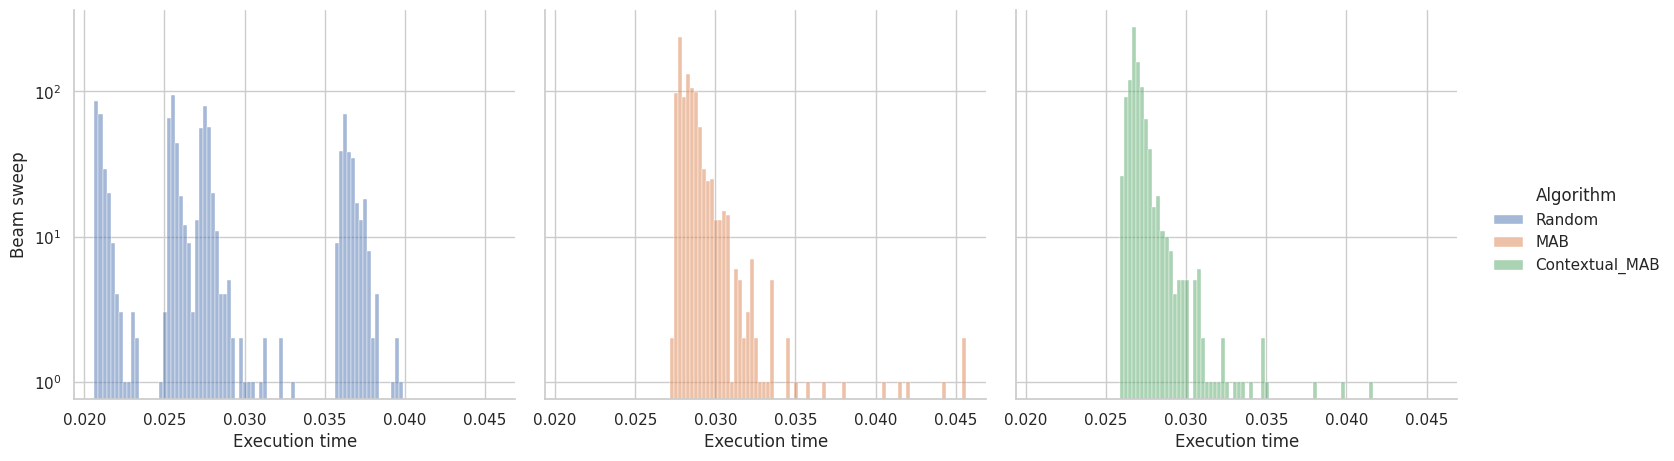

In [7]:
sns.set(style="whitegrid")
g = sns.displot(data=measurements, x="ts_diff", hue="type_str", col="type_str", log_scale=(False, True))
g.set(ylabel="Beam sweep", xlabel="Execution time", title="")
g.legend.set_title("Algorithm")

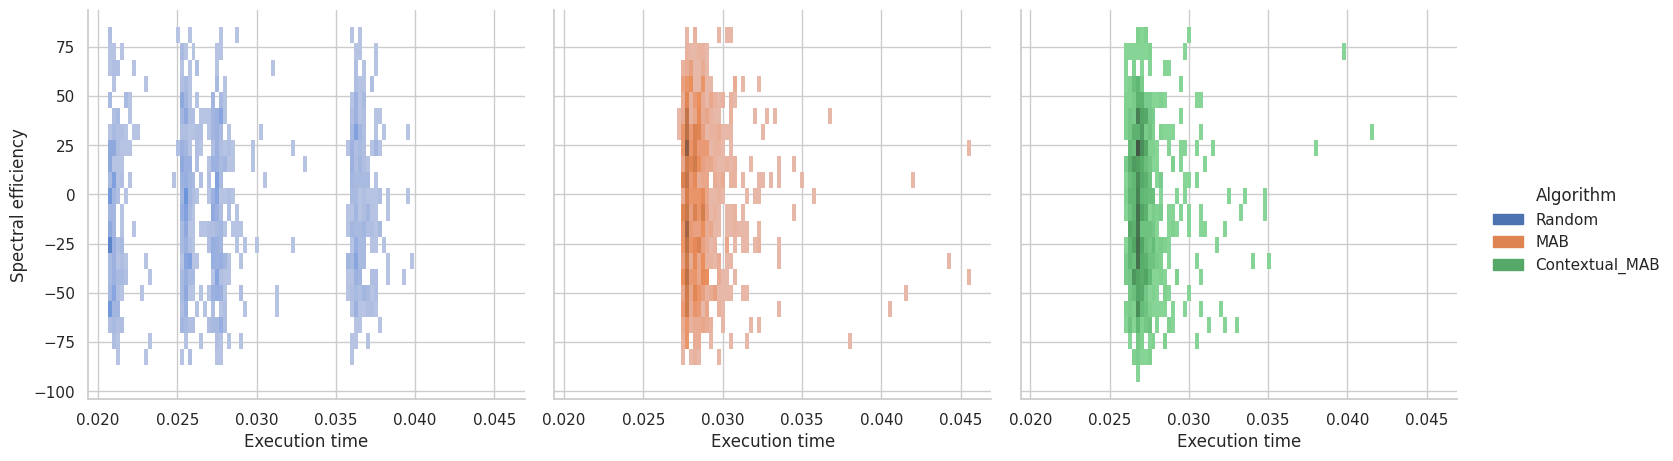

In [8]:
sns.set(style="whitegrid")
g = sns.displot(data=measurements,x="ts_diff", y="spectral_efficiency", hue="type_str", col="type_str", )
g.set(ylabel="Spectral efficiency", xlabel="Execution time", title="")
g.legend.set_title("Algorithm")
plt.show(g)

[Text(0, 0.5, 'spectral efficiency'),
 Text(0.5, 0, 'distance'),
 Text(0.5, 1.0, '')]

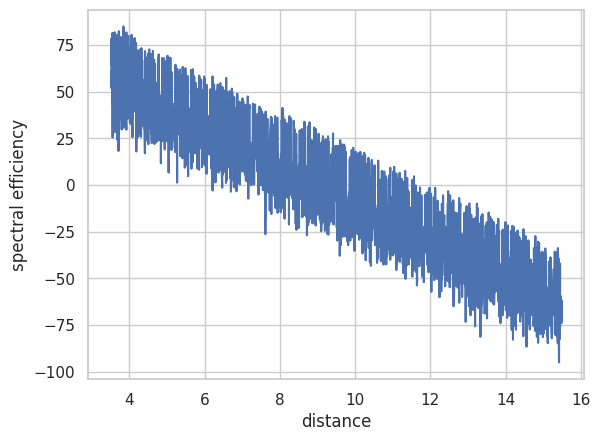

In [9]:
g = sns.lineplot(data=measurements, x="distance", y="spectral_efficiency")
g.set(ylabel="spectral efficiency", xlabel="distance", title="")

In [ ]:
total = 0
increment = 0
for i in measurements.loc[:"type","differential"]:
    total = total + measurements.loc[increment].at["differential"]
    increment = increment+1

print(total/2000)
 


0.0009388766288757325


In [ ]:
total = 0
increment = 0
for i in measurements.loc[:"ma","differential"]:
    total = total + measurements.loc[increment].at["differential"]
    increment = increment+1

print(total/2000)

0.0009388766288757325


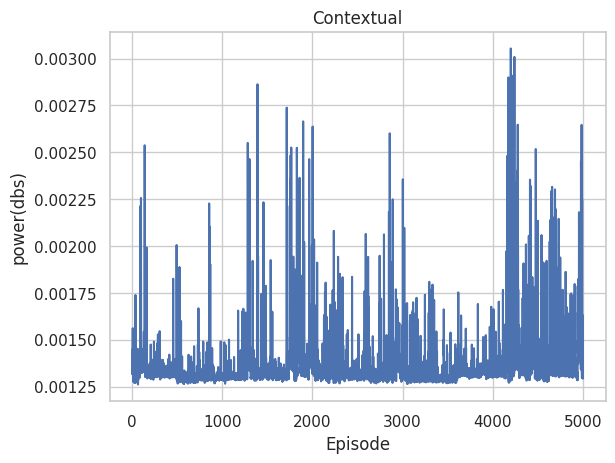

In [13]:
g = sns.lineplot(data=measurements,x="episode", y="differential")
g.set(ylabel="power(dbs)", xlabel="Episode", title="Contextual")
plt.show(g)

In [ ]:
# Training MAB
eps=0.1
mab_agent = eps_bandit(k=4, eps=eps, iters=training_episodes) 

for i in range(training_episodes): 
    action = mab_agent.act(eps)
    _ , r, _ , _ = env.step(action=action, move= True)

    # Collect reward.
    mab_agent.learn(reward=r, action=action) 

# Training Contextual MAB    
eps=0.1
lr= 0.15
contextual_agent = contextual_bandit(k=4, eps=eps, iters=training_episodes, hidden_size=32, 
    state_size=3, learning_rate=lr)  

for i in range(training_episodes): 
    flat_state = np.array([env.state[0][0][0],env.state[1],env.state[2]])
    action = contextual_agent.act(flat_state)
    _ , r, _ , _ = env.step(action=action, move= True)

    # Collect reward.
    contextual_agent.learn(reward=r, state=flat_state, action=action) 

In [6]:
import torch
from torch import optim

print(contextual_agent.neuralNet.state_dict())


OrderedDict([('net.0.weight', tensor([[ 1.6031e+02, -2.2562e+01,  3.5859e-01],
        [ 1.6043e+02, -2.0553e+01,  1.1959e-01],
        [ 1.5868e+02, -1.0818e+01,  5.6105e-01],
        [-8.9709e+01,  1.5505e+02, -8.6201e-02],
        [ 1.6141e+02, -2.1190e+01,  4.0168e-02],
        [ 1.5996e+02, -2.0711e+01, -1.8590e-01],
        [ 1.5741e+02, -2.2911e+01,  5.4196e-01],
        [ 1.5895e+02, -2.4551e+01,  3.6978e-01],
        [ 1.5830e+02, -2.4319e+01, -1.0669e-01],
        [ 1.4943e+02, -4.6430e+01, -3.0788e-01],
        [-1.1877e+02,  1.4220e+02,  1.2432e-01],
        [-1.8124e+02,  5.8310e+01, -2.6426e-01],
        [ 1.5788e+02, -7.6546e+00,  2.6956e-01],
        [ 1.5841e+02, -2.0798e+01, -5.1457e-01],
        [ 1.5780e+02, -2.2255e+01,  3.0506e-01],
        [-1.8146e+02,  5.8280e+01, -1.6709e-01],
        [-8.3111e+01,  1.5667e+02,  1.8665e-01],
        [-1.8180e+02,  5.7579e+01,  4.8971e-01],
        [ 1.5919e+02, -2.2391e+01, -3.1035e-01],
        [ 1.2110e+02,  7.6417e+01,  1.3

In [7]:
for param_tensor in contextual_agent.neuralNet.state_dict():
    print(param_tensor, "\t", contextual_agent.neuralNet.state_dict()[param_tensor].size)

net.0.weight 	 <built-in method size of Tensor object at 0x7fa8b6182c70>
net.0.bias 	 <built-in method size of Tensor object at 0x7fa8c1c5d7c0>
net.2.weight 	 <built-in method size of Tensor object at 0x7fa8b451edb0>
net.2.bias 	 <built-in method size of Tensor object at 0x7fa8c1c5d7c0>
net.4.weight 	 <built-in method size of Tensor object at 0x7fa8b61220e0>
net.4.bias 	 <built-in method size of Tensor object at 0x7fa8b6182900>
net.6.weight 	 <built-in method size of Tensor object at 0x7fa8b6122360>
net.6.bias 	 <built-in method size of Tensor object at 0x7fa8b6182bd0>
net.8.weight 	 <built-in method size of Tensor object at 0x7fa8b6178c70>
net.8.bias 	 <built-in method size of Tensor object at 0x7fa8b61782c0>
net.10.weight 	 <built-in method size of Tensor object at 0x7fa8b61789a0>
net.10.bias 	 <built-in method size of Tensor object at 0x7fa8b61782c0>


In [8]:
contextual_agent.neuralNet

DQN(
  (net): Sequential(
    (0): Linear(in_features=3, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=128, bias=True)
    (5): ReLU()
    (6): Linear(in_features=128, out_features=64, bias=True)
    (7): ReLU()
    (8): Linear(in_features=64, out_features=32, bias=True)
    (9): ReLU()
    (10): Linear(in_features=32, out_features=4, bias=True)
  )
)

In [ ]:
torch.save(contextual_agent.neuralNet.state_dict(),"/home/adrian/RLEXPMOD/RLEXPMOD")

In [ ]:
torch.save(contextual_agent, "/home/adrian/RLEXPMOD/RLEXPMOD")

In [ ]:
from actorcritic
contextual_agent.neuralNet.eval()

In [ ]:
torch.save(contextual_agent.neuralNet.state_dict(), "/home/adrian/RLEXPMOD/readableversion")

In [ ]:
model = contextual_agent
print(model)

In [ ]:
optimizer = optim.SGD(contextual_agent.neuralNet.parameters(), lr = 0.15, momentum=0.9)

In [ ]:
print(optimizer.state_dict())

In [ ]:
File = "model.pth"
torch.save(model, File)
model = torch.load(File)

for param in contextual_agent.neuralNet.parameters():
    print(param)

In [ ]:
pip install onnx onnxruntime

In [ ]:
import io
import numpy as np
from torch import nn
import torch.utils.model_zoo as model_zoo
import torch.onnx